In [1]:
#from censusdis.datasets import ACS5

ACS5 = 'acs/acs5'

import pandas as pd

pd.set_option('display.max_colwidth', 200)

<br/><br/><br/>

<font size=7>**Introduction to Working with U.S. Census Data in Python**</font>

<font size=5>**PyData Seattle 2023**
<br/><br/>
[**Darren Erik Vengroff, Ph.D.**](https://www.linkedin.com/in/vengroff/)
<br/>
April 23, 2023
</font>

<br/><br/>

<font size=6>Live interactive notebook: [LINK]</font>

<br/>
Special thanks to:

<div>
    <img src="./images/communitycoalitiononrace_logo.png" alt="Community Coalition on Race Logo", width="200"/>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    <img src="./images/ts-logo.svg" alt="Two Sigma Logo", width="200"/>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    <img src="./images/logo-ts-data-clinic.png" alt="TS Data Clinic Logo", width="200"/>
</div>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Outline

- The U.S. Census data model
- A "Hello, World." query
- Geography
- Discovering data sets, groups, and variables

- BREAK

- Putting it all together
- Guided hands-on exercise
- Discussion and Q&A

<br/><br/><br/><br/><br/><br/><br/><br/>

<br/><br/><br/><br/>

## Prerequisites

Basic familiarity with:
- [Python](https://python.org/)
- [Jupyter notebooks](https://jupyter.org/)
- [Pandas](https://pandas.pydata.org/) 

But never fear, you can still follow the presentation without these,
and you can pick up the basics you need to know after the fact.

<br/><br/><br/><br/><br/><br/><br/><br/>

<br/><br/><br/><br/>

# The U.S. Census Data Model

1. Data sets and vintages
2. Groups
3. Variables
4. Geographies
5. Timeseries

<br/><br/><br/><br/><br/><br/><br/><br/>

## *Data set* - a collection of variables
- Example 1: American Community Survey (ACS)
  - 1, 3, and 5 year surveys of U.S. residents
  - Tens of thousands of variables covering demographic, social, and economic concepts.
    - Age
    - Gender
    - Race / Ethnicity
    - Employment
    - Income
    - Housing
- Example 2: Redistricting Data
  - published every 10 years to support defining congressional districts. 
  - Only a few dozen variables.
    - Population
    - Race / Ethnicity
  - Very high geographic resolution; down to individual blocks

## *Vintage* - a point in time, often a year, indicating when a version of a data set was published.
- Examples: 2019, 2020, 2021
- Not every data set exists for every vintage
  - ACS 5 is published for every year 2009-2021
      - 2022 data expected soon
  - ACS 3 started in 2005 and was discontinued in 2013 
  - Redistricting data is only published once every ten years (2000, 2010, 2020)

## *Variable* - A measured or computed quantity
  - Example 1: total population 
  - Example 2: median household income
  - Example 3: number of people who identify as Hispanic or Latino

## *Group* - A set of related variables from the same data set.
  - Example: number of people identifying as one of several races of combinations thereof

## *Geography* - a geographic area in which a variable was measured.
  - Example: A state
  - Example: A county
  - Example: A metropolitan area

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# "Hello, World" and Some Variations

We will query
 - the **American Community Survey 5-Year Data** (*dataset*)
 - **2020** (*vintage*) 
 - for **median household income** (*variable*)
 - in **Washington State** (*geography*).
 
Using
 - [`censusdis.data.download`](https://censusdis.readthedocs.io/en/latest/data.html#censusdis.data.download),
the workhorse API of censusdis

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Making the Query

In [2]:
import censusdis.data as ced
from censusdis import states

df_wa_income = ced.download(
    
    # Data set: American Community Survey 5-Year
    ACS5,
    
    # Vintage: 2020
    2020, 
    
    # Variable: median household income
    download_variables=['B19013_001E'], 
    
    # Geography: Washington State
    state=states.WA
)

df_wa_income

,STATE,B19013_001E
0,53,77006


## Intepreting the Results

We asked for data from a single geography, Washington State, so the return value is a data frame with only one row.

The data frame has two columns:
 - `STATE`, the [FIPS code](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) for Washington State. This is also the value of `censusdis.states.WA`.
 - `B19013_00E`, the value of variable we asked for, which is an estimate of median household income<sup>*</sup>.
 
So, according to this data, the median household income in Washington State is $77,006.
 
<sup>*</sup>How did we know that that variable was? More on that to come...

## What Happened Behind the Scenes?

`censusdis.data.download` 
  - Constructed a query URL:
    - https://api.census.gov/data/2020/acs/acs5?get=B19013_001E&for=state:53.
  - Made the query.
  - Got a JSON response:
    - `[["B19013_001E","state"],["77006","53"]]`
  - Parsed the response and turned it into a data frame
  
It's not rocket science for a simple query like this, but it's convenient to have
a nice pythonic API.

## Variation: More than One State

We don't have to limit our queries to just a single geography.

We can query several states at once.

In [3]:
df_west_coast_income = ced.download(
    ACS5,
    2020,
    download_variables=['B19013_001E'], 
    
    # Three states this time.
    state=[states.WA, states.OR, states.CA]  
)

df_west_coast_income

,STATE,B19013_001E
0,06,78672
1,41,65667
2,53,77006


## Variation: More than One Variable

We can also query several variables at once.

We'll add the variable `NAME` to our query so it is easier for those of us who don't dream in FIPS codes to know what state each row represents.

In [4]:
df_west_coast_income = ced.download(
    dataset=ACS5,
    vintage=2020,
    
    # Name and median household income
    download_variables=['NAME', 'B19013_001E'],  
    
    state=[states.WA, states.OR, states.CA]
)

df_west_coast_income

,STATE,NAME,B19013_001E
0,06,California,78672
1,41,Oregon,65667
2,53,Washington,77006


## All the states

We can use `'*'` as a wildcard to get all known geographies of a given
type.

In [5]:
df_all_states = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
    
    # Wild card for all the states
    state='*'
)

df_all_states

,STATE,NAME,B19013_001E
0,42,Pennsylvania,63627
1,06,California,78672
2,54,West Virginia,48037
3,49,Utah,74197
4,36,New York,71117
5,11,District of Columbia,90842
6,02,Alaska,77790
7,12,Florida,57703
8,45,South Carolina,54864
9,38,North Dakota,65315


## The results are an ordinary pd.DataFrame

So I can do whatever analysis I might normally do with a data frame.
For example, what are the top ten states by median income?

In [6]:
df_all_states.nlargest(10, 'B19013_001E')

,STATE,NAME,B19013_001E
5,11,District of Columbia,90842
30,24,Maryland,87063
29,34,New Jersey,85245
23,25,Massachusetts,84385
21,15,Hawaii,83173
20,09,Connecticut,79855
1,06,California,78672
13,33,New Hampshire,77923
6,02,Alaska,77790
35,53,Washington,77006


Or the bottom ten?

In [7]:
df_all_states.nsmallest(10, 'B19013_001E')

,STATE,NAME,B19013_001E
48,72,Puerto Rico,21058
39,28,Mississippi,46511
2,54,West Virginia,48037
34,05,Arkansas,49475
17,22,Louisiana,50800
45,35,New Mexico,51243
12,01,Alabama,52035
49,21,Kentucky,52238
37,40,Oklahoma,53840
51,47,Tennessee,54833


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Geography, GeoDataFrames, and Maps

- We have been querying data at the state level.
- What does the data look like on a map?
- What other geographies are available?

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query Geometry along with Data

- The return value is now a `geopandas.GeoDataFrame`
- This is an extension of a `pandas.DataFrame` that adds `geometry` to each row.

In [8]:
gdf_all_states = ced.download(
    ACS5,
    2020,
    download_variables=['NAME', 'B19013_001E'], 
    state='*',
    
    # We want the geometry of the states too:
    with_geometry=True
)

gdf_all_states.head()

,STATE,NAME,B19013_001E,geometry
0,42,Pennsylvania,63627,"POLYGON ((-80.51989 40.90666, -80.51963 40.91142, -80.51909 40.92106, -80.51909 40.92160, -80.51905 40.95336, -80.51905 40.95336, -80.51904 40.95873, -80.51900 40.98738, -80.51899 40.99411, -80.51..."
1,06,California,78672,"MULTIPOLYGON (((-118.60442 33.47855, -118.59878 33.47794, -118.58594 33.47382, -118.58025 33.47510, -118.57035 33.47531, -118.55760 33.47472, -118.54453 33.47412, -118.53862 33.47702, -118.53428 3..."
2,54,West Virginia,48037,"POLYGON ((-82.64320 38.16909, -82.64300 38.16956, -82.63905 38.17111, -82.62546 38.17049, -82.61943 38.16903, -82.61602 38.16972, -82.61349 38.17024, -82.61241 38.17090, -82.61134 38.17155, -82.60..."
3,49,Utah,74197,"POLYGON ((-114.05296 37.59278, -114.05247 37.60478, -114.05231 37.63632, -114.05184 37.72404, -114.05173 37.74600, -114.05178 37.74625, -114.05167 37.74696, -114.05111 37.75628, -114.04992 37.7655..."
4,36,New York,71117,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 41.25546, -72.03374 41.25715, -72.03081 41.26120, -72.02944 41.26309, -72.02608 41.26514, -72.02549 41.26550, -72.02527 41.26719, -72.02448 41.27333, ..."


### Plot the Results on a Map

- `cem.plot_us` 
  - Conveniently projects the United States
  - Relocates AK, HI, and PR for a more compact display

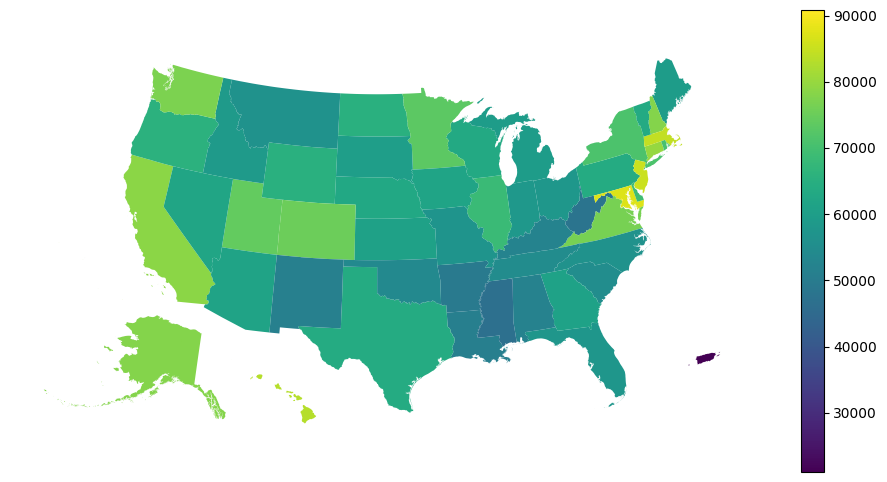

In [9]:
import censusdis.maps as cem

ax = cem.plot_us(
    gdf_all_states,
    'B19013_001E',
    
    # The **kwargs here are standard Matplotlib **kwargs
    legend=True,
    figsize=(12, 6)
)

ax.axis('off')
None

### Styling the Map

- We can add a variety of styling to the map.
- Any args Matplotlib can take, we can pass through.

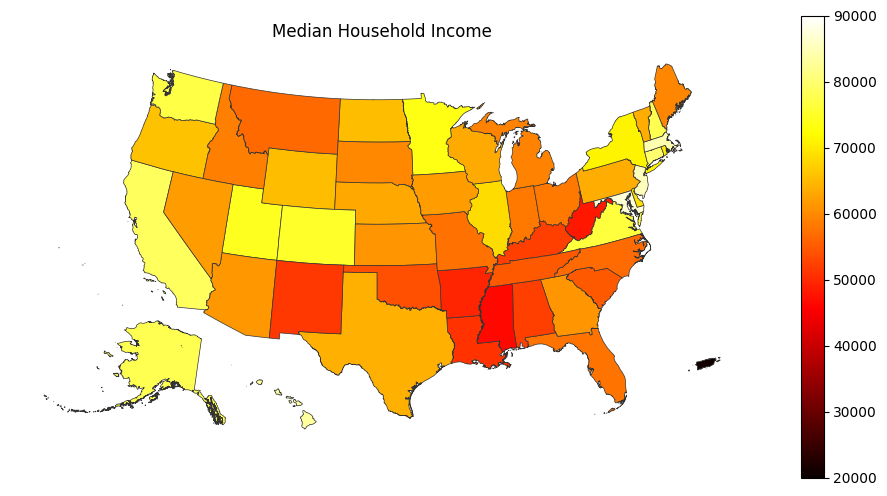

In [10]:
ax = cem.plot_us(
    gdf_all_states,
    'B19013_001E',

    # Styling with Matplotlib **kwargs
    cmap='hot',
    edgecolor='#333',
    linewidth=0.5,
    vmin=20_000,
    vmax=90_000,
        
    legend=True,
    figsize=(12, 6)
)

ax.set_title("Median Household Income")
ax.axis('off')
None

## What Happened Behind the Scenes?

As before, `censusdis.data.download` 
  - Constructed a query URL.
  - Made the query.
  - Got a JSON response.
  - Parsed the response and turned it into a data frame.
  
Then, because we passed `with_geometry=True` it
  - Downloaded a shapefile (a geometric file format) for the U.S. States from
    https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_500k.zip.
  - Unzipped and cached the shapefile locally for reuse as needed.
  - Merged the shapefile geometry for each state into the results.
  
A little more rocket science than before. Or at least a real time saver in your
research process.

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

## What other Geographies are Available?

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

In [11]:
DATASET = 'dec/pl'
YEAR = 2020

### Start with States

In [12]:
gdf_states = ced.download(
    DATASET,
    YEAR,
    ['NAME'],
    
    # All the states, as we have done before
    state="*",
    
    with_geometry=True  
)

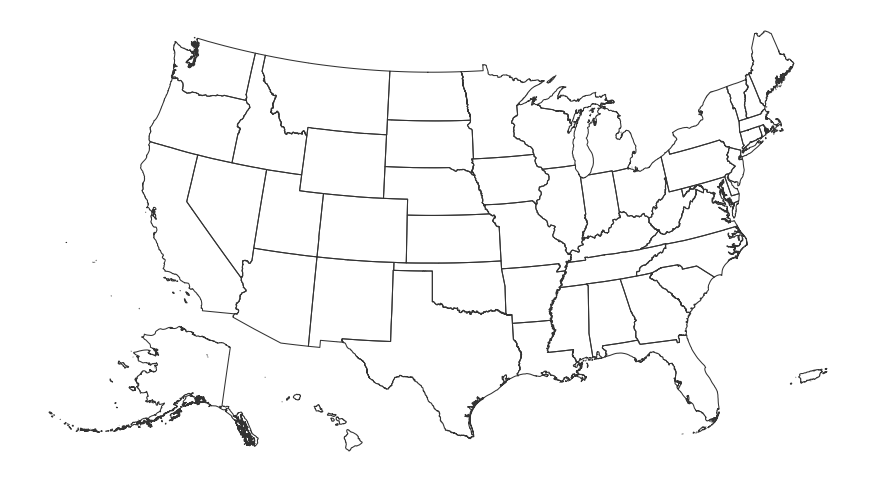

In [13]:
ax = cem.plot_us_boundary(gdf_states, linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

### Counties

We choose the state but use the wildcard `county='*'`.

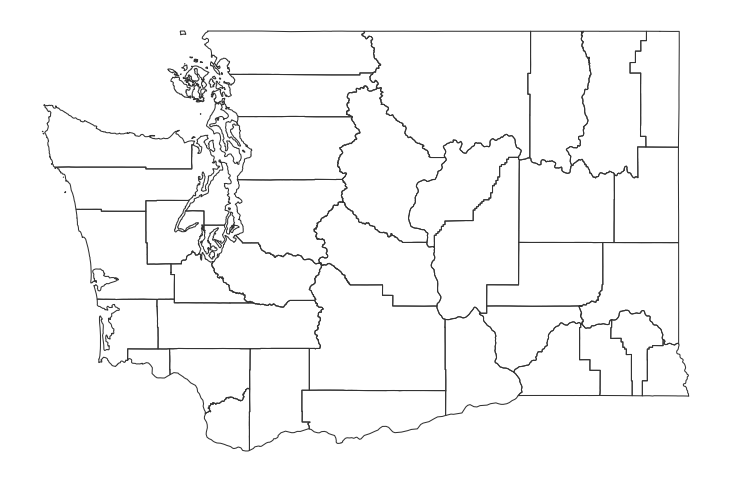

In [14]:
df_counties = ced.download(
    DATASET,
    YEAR,
    ['NAME'],
    
    # All the counties is Washington State.
    state=states.WA,
    county="*",
    
    with_geometry=True
)

ax = df_counties.boundary.plot(linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

### Find King County

In [15]:
df_counties[df_counties['NAME'].str.startswith("King")]

,STATE,COUNTY,NAME,geometry
15,53,033,"King County, Washington","MULTIPOLYGON (((-122.43694 47.66172, -122.42551 47.66471, -122.42269 47.66661, -122.41584 47.67062, -122.40918 47.67174, -122.40928 47.67267, -122.40962 47.67584, -122.40966 47.67622, -122.40784 4..."


### Census Tracts

- Tracts typically have 1-5,000 residents
- There are ~80,000 tracts in the U.S.

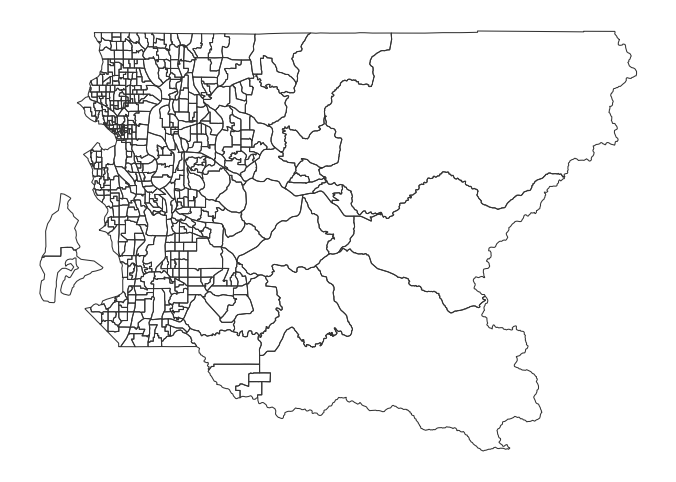

In [16]:
df_tracts = ced.download(
    DATASET,
    YEAR,
    ['NAME'],
    
    # All the census tracts in King County
    state=states.WA,
    county="033",
    tract="*",
    
    with_geometry=True
)

ax = df_tracts.boundary.plot(linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

### Block Groups

- This is the finest level of geography in ACS data.

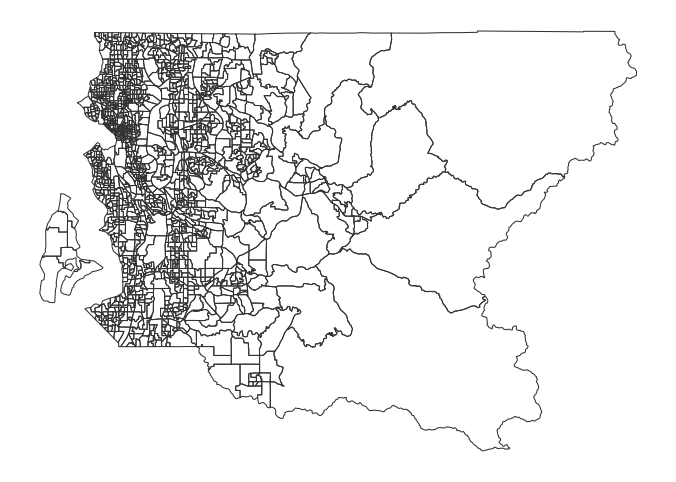

In [17]:
df_block_group = ced.download(
    DATASET,
    YEAR,
    ['NAME'],
    
    # All the block groups in King County, WA
    state=states.WA,
    county="033",
    tract="*",
    block_group="*",
    
    with_geometry=True
)

ax = df_block_group.boundary.plot(linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

## Plot Data at the Block Group Level

In [18]:
from censusdis.values import ALL_SPECIAL_VALUES

gdf_block_group = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
   
    state=states.WA,
    county="033",
    tract="*",
    block_group="*",
    
    with_geometry=True,
    
    # The census API puts in some special values like
    # -666666666 to indicate that data is missing for
    # any of several reasons. For now, we will just
    # set all of these special values to NaN.
    set_to_nan=ALL_SPECIAL_VALUES
)

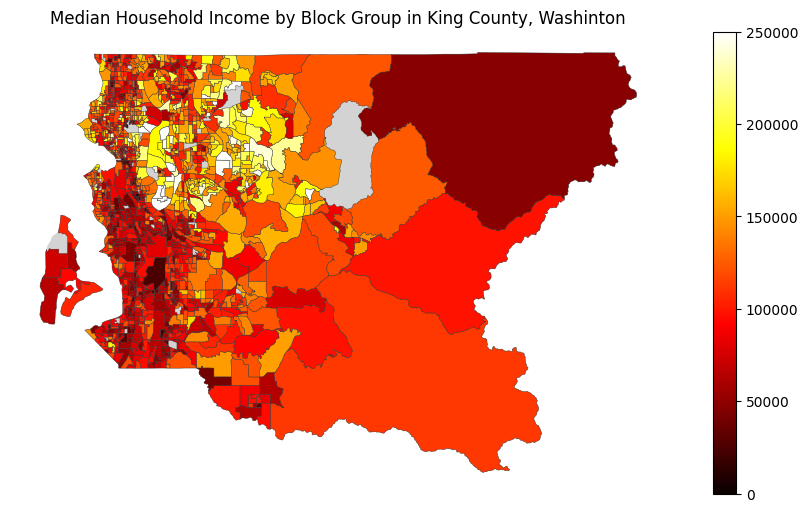

In [19]:
# First plot light grey everywhere.
ax = gdf_block_group.plot(
    color='lightgrey',
    figsize=(12, 6)
)

# On top of that, dropna() for the cases where data was
# not published, then plot median income.
ax = gdf_block_group.plot(
    'B19013_001E',

    cmap='hot',
    edgecolor='#333',
    linewidth=0.3,
    vmin=0,
    vmax=250_000,
        
    legend=True,
    ax=ax
)

ax.set_title("Median Household Income by Block Group in King County, Washinton")
ax.axis('off')
None

## Off-Spine Geography

- *State - County - Tract - Block Group* is not the only
geography hierarchy for which the U.S. Census publishes data.
- Not all geographies nest like these do.

### Query Combined Statistical Areas (CSAs) in the United States

- CSAs represent greater metropolitan areas
- They may cross state lines

In [20]:
gdf_csa = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
   
    # Query all CSAs in the country.
    combined_statistical_area='*',
    
    with_geometry=True
)

Text(0.5, 1.0, 'CSAs in the United States')

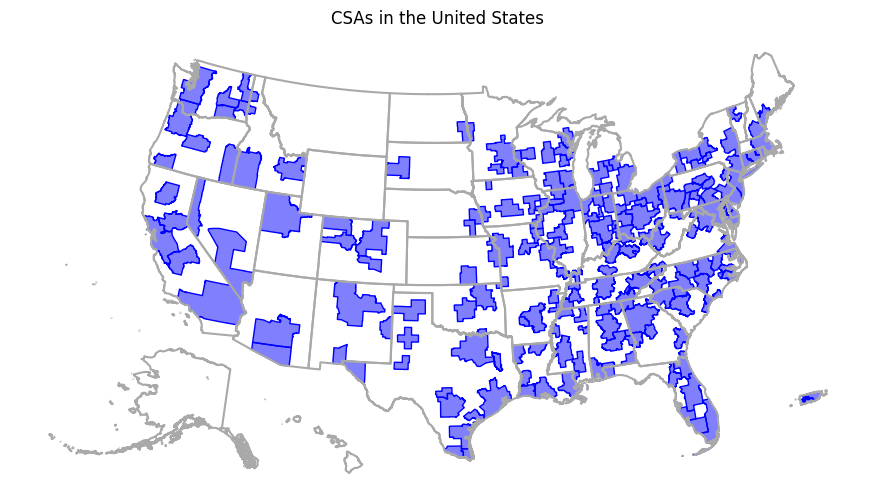

In [21]:
ax = cem.plot_us_boundary(
    gdf_states,
    color='darkgrey',
    figsize=(12,6)
)

ax = cem.plot_us(
    gdf_csa,
    color='#0000FF7f',
    edgecolor='#0000FF',
    ax=ax
)

ax.axis('off')
ax.set_title('CSAs in the United States')

### Just those that intersect Washington State

- We'll do a spatial join to find these
- This is just scratching the surface of the spatial operations a `GeoDataFrame` can do.

In [22]:
# Start with just the WA row from our state geo data frame.
gdf_wa = gdf_states[gdf_states['STATE']==states.WA]
gdf_wa

,STATE,NAME,geometry
35,53,Washington,"MULTIPOLYGON (((-122.33164 48.02056, -122.32834 48.02134, -122.32236 48.02104, -122.32135 48.01877, -122.32029 48.01693, -122.31639 48.01559, -122.31489 48.01346, -122.30971 48.01280, -122.30885 4..."


In [23]:
# geopandas.GeoDataFrame.sjoin() does a spatial join.
# It defaults to intersection.
gdf_wa_csa = gdf_csa.sjoin(gdf_wa)

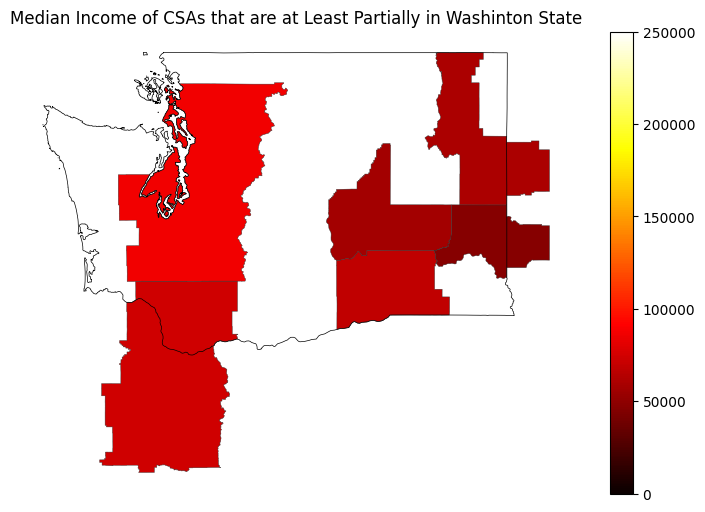

In [24]:
# Plot the state boundary
ax = gdf_wa.boundary.plot(
    color='black',
    linewidth=0.5,
    figsize=(9, 6))

# Plot median income on top
ax = gdf_wa_csa.plot(
    'B19013_001E',

    cmap='hot',
    edgecolor='#333',
    linewidth=0.3,
    vmin=0,
    vmax=250_000,
        
    legend=True,
    ax=ax
)

ax.axis('off')
ax.set_title('Median Income of CSAs that are at Least Partially in Washinton State')
None

In [25]:
list(ced.geographies(ACS5, 2020))

[['us'],
 ['region'],
 ['division'],
 ['state'],
 ['state', 'county'],
 ['state', 'county', 'county_subdivision'],
 ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 ['state', 'county', 'tract'],
 ['state', 'county', 'tract', 'block_group'],
 ['state', 'place', 'county_or_part'],
 ['state', 'place'],
 ['state', 'consolidated_city'],
 ['state', 'consolidated_city', 'place_or_part'],
 ['state', 'alaska_native_regional_corporation'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_subdivision_remainder'],
 ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_census_tract'],
 ['american_indian_area_alaska_native_area_hawaiian_home

In [26]:
gdf_csa_part = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
   
    # Query all CSAs with a part in WA.
    state=states.WA,
    combined_statistical_area_or_part='*',
)

In [37]:
gdf_csa_part

,STATE,COMBINED_STATISTICAL_AREA_OR_PART,NAME,B19013_001E
0,53,313,"Kennewick-Richland-Walla Walla, WA CSA; Washington",68339
1,53,393,"Moses Lake-Othello, WA CSA; Washington",57615
2,53,440,"Portland-Vancouver-Salem, OR-WA CSA (part); Washington",73097
3,53,446,"Pullman-Moscow, WA-ID CSA (part); Washington",42288
4,53,500,"Seattle-Tacoma, WA CSA; Washington",86409
5,53,518,"Spokane-Spokane Valley-Coeur d'Alene, WA-ID CSA (part); Washington",59656


In [38]:
gdf_wa_csa

,COMBINED_STATISTICAL_AREA,NAME_left,B19013_001E,geometry,index_right,STATE,NAME_right
77,313,"Kennewick-Richland-Walla Walla, WA CSA",68339,"POLYGON ((-119.87508 46.57728, -119.87404 46.62828, -119.86671 46.62662, -119.85769 46.62630, -119.85398 46.62594, -119.83640 46.62546, -119.83225 46.62564, -119.82243 46.62608, -119.81490 46.6276...",35,53,Washington
110,393,"Moses Lake-Othello, WA CSA",57615,"POLYGON ((-120.04287 47.07345, -120.04227 47.07625, -120.04047 47.08125, -120.03847 47.08515, -120.03767 47.08745, -120.03447 47.09355, -120.02757 47.10525, -120.02607 47.10685, -120.01887 47.1103...",35,53,Washington
131,440,"Portland-Vancouver-Salem, OR-WA CSA",73355,"POLYGON ((-123.81671 44.34462, -123.77662 44.34455, -123.74785 44.34551, -123.73500 44.34578, -123.73515 44.36035, -123.71554 44.36046, -123.71568 44.37997, -123.71587 44.38949, -123.72014 44.3895...",35,53,Washington
133,446,"Pullman-Moscow, WA-ID CSA",46290,"POLYGON ((-118.24912 46.73414, -118.24550 46.73480, -118.23989 46.73811, -118.23813 46.73708, -118.23631 46.73479, -118.23350 46.73387, -118.23070 46.73446, -118.22724 46.73657, -118.22025 46.7367...",35,53,Washington
154,500,"Seattle-Tacoma, WA CSA",86409,"MULTIPOLYGON (((-122.33164 48.02056, -122.32834 48.02134, -122.32236 48.02104, -122.32135 48.01877, -122.32029 48.01693, -122.31639 48.01559, -122.31489 48.01346, -122.30971 48.01280, -122.30885 4...",35,53,Washington
157,518,"Spokane-Spokane Valley-Coeur d'Alene, WA-ID CSA",59909,"POLYGON ((-118.40241 48.02638, -118.40081 48.02868, -118.39891 48.03028, -118.39661 48.03168, -118.38941 48.03528, -118.38401 48.03708, -118.37971 48.03938, -118.37611 48.04072, -118.36946 48.0426...",35,53,Washington


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Discovering Variables

Those queries were fun, but 
- how did we know that median household income was represented by the variable, `'B19013_001E'`? 
- how do we explore groups and individual variables to find variables that might interest us?

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

## All the Groups in a Data Set / Vintage

In [27]:
df_groups = ced.variables.all_groups(ACS5, 2020)

df_groups

,DATASET,YEAR,GROUP,DESCRIPTION
0,acs/acs5,2020,B01001,SEX BY AGE
1,acs/acs5,2020,B01001A,SEX BY AGE (WHITE ALONE)
2,acs/acs5,2020,B01001B,SEX BY AGE (BLACK OR AFRICAN AMERICAN ALONE)
3,acs/acs5,2020,B01001C,SEX BY AGE (AMERICAN INDIAN AND ALASKA NATIVE ALONE)
4,acs/acs5,2020,B01001D,SEX BY AGE (ASIAN ALONE)
...,...,...,...,...
1135,acs/acs5,2020,C27014,PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE
1136,acs/acs5,2020,C27016,HEALTH INSURANCE COVERAGE STATUS BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE
1137,acs/acs5,2020,C27017,PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE
1138,acs/acs5,2020,C27018,PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE


## Finding Interesting Groups

In [28]:
df_groups[df_groups['DESCRIPTION'].str.contains('MEDIAN HOUSEHOLD INCOME')]

,DATASET,YEAR,GROUP,DESCRIPTION
494,acs/acs5,2020,B19013,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)
495,acs/acs5,2020,B19013A,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE HOUSEHOLDER)
496,acs/acs5,2020,B19013B,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)
497,acs/acs5,2020,B19013C,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER)
498,acs/acs5,2020,B19013D,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (ASIAN ALONE HOUSEHOLDER)
499,acs/acs5,2020,B19013E,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE HOUSEHOLDER)
500,acs/acs5,2020,B19013F,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (SOME OTHER RACE ALONE HOUSEHOLDER)
501,acs/acs5,2020,B19013G,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (TWO OR MORE RACES HOUSEHOLDER)
502,acs/acs5,2020,B19013H,"MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)"
503,acs/acs5,2020,B19013I,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (HISPANIC OR LATINO HOUSEHOLDER)


## Variables in a Group

This particular group has only one variable.

In [29]:
ced.variables.all_variables(ACS5, 2020, 'B19013')

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,acs/acs5,B19013,B19013_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),NaN,None


## A Group with Several Variables

In [30]:
ced.variables.all_variables(ACS5, 2020, 'B25119')

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,acs/acs5,B25119,B25119_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) --!!Total:,NaN,None
1,2020,acs/acs5,B25119,B25119_002E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) --!!Total:!!Owner occupied (dollars),NaN,None
2,2020,acs/acs5,B25119,B25119_003E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) --!!Total:!!Renter occupied (dollars),NaN,None


## A Group with Many Variables

In [31]:
ced.variables.all_variables(ACS5, 2020, "B03002")

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,acs/acs5,B03002,B03002_001E,Estimate!!Total:,NaN,None
1,2020,acs/acs5,B03002,B03002_002E,Estimate!!Total:!!Not Hispanic or Latino:,NaN,None
2,2020,acs/acs5,B03002,B03002_003E,Estimate!!Total:!!Not Hispanic or Latino:!!White alone,NaN,None
3,2020,acs/acs5,B03002,B03002_004E,Estimate!!Total:!!Not Hispanic or Latino:!!Black or African American alone,NaN,None
4,2020,acs/acs5,B03002,B03002_005E,Estimate!!Total:!!Not Hispanic or Latino:!!American Indian and Alaska Native alone,NaN,None
5,2020,acs/acs5,B03002,B03002_006E,Estimate!!Total:!!Not Hispanic or Latino:!!Asian alone,NaN,None
6,2020,acs/acs5,B03002,B03002_007E,Estimate!!Total:!!Not Hispanic or Latino:!!Native Hawaiian and Other Pacific Islander alone,NaN,None
7,2020,acs/acs5,B03002,B03002_008E,Estimate!!Total:!!Not Hispanic or Latino:!!Some other race alone,NaN,None
8,2020,acs/acs5,B03002,B03002_009E,Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:,NaN,None
9,2020,acs/acs5,B03002,B03002_010E,Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:!!Two races including Some other race,NaN,None


## Variables in a Group as a Tree

In many groups, 

- variables and their values are aggregated in a tree
- the tree is implicitly encoded as root-to-note paths in each variable's label
  - Uses `!!` and `:`  
- `ced.variables.group_tree` can query the structure of the tree
  - Labels are parsed for us

In [32]:
ced.variables.group_tree(ACS5, 2020, "B25119")

+ Estimate
    + Median household income in the past 12 months (in 2020 inflation-adjusted dollars) --
        + Total: (B25119_001E)
            + Owner occupied (dollars) (B25119_002E)
            + Renter occupied (dollars) (B25119_003E)

In [33]:
ced.variables.group_tree(ACS5, 2020, "B03002")

+ Estimate
    + Total: (B03002_001E)
        + Not Hispanic or Latino: (B03002_002E)
            + White alone (B03002_003E)
            + Black or African American alone (B03002_004E)
            + American Indian and Alaska Native alone (B03002_005E)
            + Asian alone (B03002_006E)
            + Native Hawaiian and Other Pacific Islander alone (B03002_007E)
            + Some other race alone (B03002_008E)
            + Two or more races: (B03002_009E)
                + Two races including Some other race (B03002_010E)
                + Two races excluding Some other race, and three or more races (B03002_011E)
        + Hispanic or Latino: (B03002_012E)
            + White alone (B03002_013E)
            + Black or African American alone (B03002_014E)
            + American Indian and Alaska Native alone (B03002_015E)
            + Asian alone (B03002_016E)
            + Native Hawaiian and Other Pacific Islander alone (B03002_017E)
            + Some other race alone (B0300

## Get a List of Leaves

In [34]:
ced.variables.group_leaves(ACS5, 2020, "B25119")

['B25119_002E', 'B25119_003E']

In [35]:
ced.variables.group_leaves(ACS5, 2020, "B03002")

['B03002_003E',
 'B03002_004E',
 'B03002_005E',
 'B03002_006E',
 'B03002_007E',
 'B03002_008E',
 'B03002_010E',
 'B03002_011E',
 'B03002_013E',
 'B03002_014E',
 'B03002_015E',
 'B03002_016E',
 'B03002_017E',
 'B03002_018E',
 'B03002_020E',
 'B03002_021E']

## Query All Variables in a Group

In [39]:
df_west_coast_income_by_tenure = ced.download(
    dataset=ACS5,
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are in this group
    group="B25119",
    
    state=[states.WA, states.OR, states.CA]
)

df_west_coast_income_by_tenure

,STATE,NAME,B25119_001E,B25119_002E,B25119_003E
0,06,California,78672,102875,55241
1,41,Oregon,65667,82264,43802
2,53,Washington,77006,95075,52022


## Query Just the Leaves of a Group

In [41]:
df_west_coast_demographics = ced.download(
    dataset=ACS5,
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are leaves of this group
    leaves_of_group="B03002",
    
    state=[states.WA, states.OR, states.CA]
)

In [42]:
df_west_coast_demographics

,STATE,NAME,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03002_010E,B03002_011E,B03002_013E,B03002_014E,B03002_015E,B03002_016E,B03002_017E,B03002_018E,B03002_020E,B03002_021E
0,06,California,14365145,2142371,131724,5743983,135524,124148,98006,1224193,7688576,108591,179905,90329,14112,5499599,1374229,425588
1,41,Oregon,3128494,75418,35842,185221,15614,10660,14677,158141,320587,3699,9841,2580,831,129587,53585,31569
2,53,Washington,5067909,279720,75677,656578,49219,23363,24106,364371,455972,10525,16089,6324,1898,337215,96322,47177


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
# BREAK
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>